In [38]:
# %%capture
import sys
import json
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy
import numpy as np
# from scipy import stats
import matplotlib.pyplot as plt
import csv

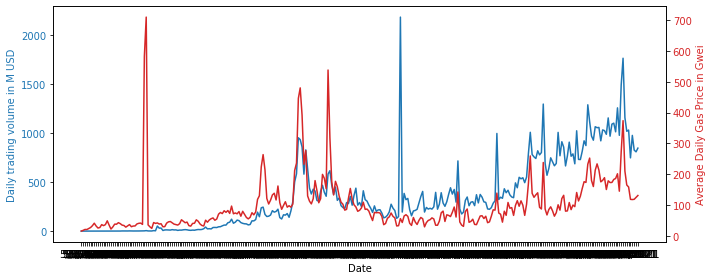

In [48]:
def read_json(file_name):
    with open(file_name) as json_file:
        return json.load(json_file)
    
def read_csv(file_name, delimiter, key_index):
    with open(file_name, newline='') as csvfile:
        res = {}
        for row in csv.reader(csvfile, delimiter=delimiter, quotechar='"'):
            res[int(row[key_index])] = row   
        return res

def createGasVolume():
    volume_raw = read_json('uniswap_daydata.json')
    gas_raw = read_csv('export-AvgGasPrice.csv', ',', 1)
    timestamp = []
    volume = []
    gas = []
    
    for entry in volume_raw:
        timestamp.append(gas_raw[entry["date"]][0])
        volume.append(float(entry["dailyVolumeUSD"]) / 1000000)
        gas.append(int(gas_raw[entry["date"]][2]) / 1000000000)

    fig, ax1 = plt.subplots(figsize=(10, 4))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily trading volume in M USD', color=color)
    ax1.plot(timestamp, volume, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('Average Daily Gas Price in Gwei', color=color)  # we already handled the x-label with ax1
    ax2.plot(timestamp, gas, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.savefig('gas_volume.png')
    plt.show()
    
createGasVolume()